In this code, we first load the dataset and split it into features X and labels y. We then initialize a KFold object with 10 splits, shuffle the data, and set a random seed for reproducibility. Next, we initialize a Ada Boost regression model and iterate over each split of the data. For each split, we split the data into training and testing sets, fit the model on the training data, and evaluate its performance on the testing data. Finally, we print the accuracy of the model for each split.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_excel('RE_Data.xlsx')

In [3]:
df = df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1)

In [4]:
# Shuffle the DataFrame
df_shuff = df

In [5]:
from sklearn.model_selection import train_test_split

In [13]:
var_columns = [c for c in df if c not in ['ph','ph_labels','c4']]

X = df.loc[:,var_columns].values
y = df.loc[:,'ph_labels'].values

In [17]:
X

array([[1.01453973, 1.03422478, 1.00536735],
       [0.99648304, 1.00676816, 0.99611219],
       [0.97689244, 0.99996001, 0.97513185],
       ...,
       [0.94227888, 0.97475218, 0.94160997],
       [1.00002718, 1.0221754 , 0.99267274],
       [0.98602115, 0.99246708, 0.98594222]])

In [12]:
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the model
model = AdaBoostClassifier()
# Iterate over the splits and train the model
for train_index, test_index in kf.split(X):
    # Split the data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the testing data
    accuracy = model.score(X_test, y_test)

    # Print the accuracy for each split
    print("Accuracy:", accuracy)


Accuracy: 0.5134
Accuracy: 0.4522
Accuracy: 0.5418
Accuracy: 0.492
Accuracy: 0.5284
Accuracy: 0.526
Accuracy: 0.5282
Accuracy: 0.5106
Accuracy: 0.4938
Accuracy: 0.5452


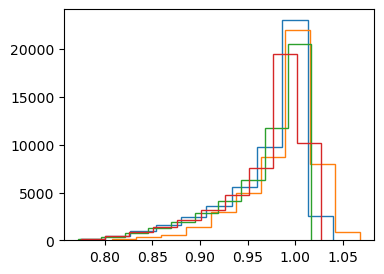

In [5]:
plt.figure(figsize=(4,3))
plt.hist(df.c1.values,histtype='step')
plt.hist(df.c2.values,histtype='step')
plt.hist(df.c3.values,histtype='step')
plt.hist(df.c4.values,histtype='step')
plt.show()

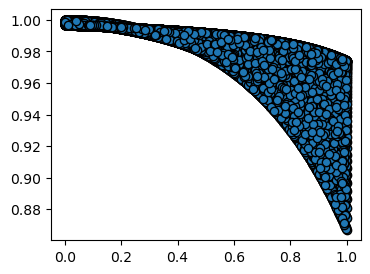

In [9]:
plt.figure(figsize=(4,3))
plt.scatter(df.ph.values,df.c1.values/df.c2.values,edgecolors='k')

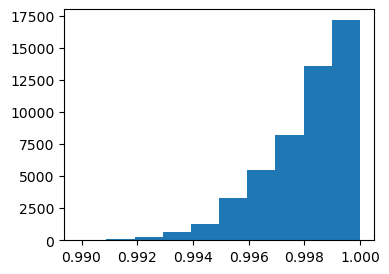

In [18]:
plt.figure(figsize=(4,3))
plt.hist(df.c3.values/df.c4.values,bins=10)
plt.show()